## Step 1.1: Choose Dataset

In this section we will do some **Exploratory Analysis for Ford GoBike System Dataset**

> **This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in Feb2019**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; #sns.set()

import matplotlib 
#matplotlib.rc('xtick', labelsize=16) 
#matplotlib.rc('ytick', labelsize=16)

## Step 1.2: Explore The Data

### Data Wrangling

In [2]:
# store and show the data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# show data size
df.shape

(183412, 16)

Dataset Contains +18K rows and 16 columns.

In [4]:
# show dataset columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
# show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

datatype doesn't make sense for some columns like (start_time and end_time)

In [6]:
# check NAN values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# show some genders
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
# show some year birth
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1927.0        1
1910.0        1
1930.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [9]:
#drop_cols = ['member_gender', 'member_birth_year', ]
drop_cols = ['start_station_id', 'end_station_id', 'bike_id']

df.drop(drop_cols, axis=1, inplace=True)

In [10]:
# drop nan value along rows-axis
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# convert time into datetime type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   user_type                174952 non-null  object        
 10  member_birth_year        174952 non-null  float64       
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

In [13]:
# show some statistics 
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [14]:
# show some samples
df.sample(10) 

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
154310,1049,2019-02-05 13:48:13.445,2019-02-05 14:05:43.105,Davis St at Jackson St,37.797280,-122.398436,4th St at Mission Bay Blvd S,37.770407,-122.391198,Subscriber,1963.0,Female,No
103740,1079,2019-02-13 00:09:10.731,2019-02-13 00:27:10.318,Jackson St at 11th St,37.800002,-122.266438,San Antonio Park,37.790140,-122.242373,Subscriber,1982.0,Male,No
121925,225,2019-02-10 15:08:22.628,2019-02-10 15:12:08.112,Mission Playground,37.759210,-122.421339,Valencia St at 24th St,37.752428,-122.420628,Subscriber,1995.0,Male,No
54933,686,2019-02-21 08:13:52.077,2019-02-21 08:25:18.486,Steuart St at Market St,37.794130,-122.394430,China Basin St at 3rd St,37.772000,-122.389970,Subscriber,1976.0,Male,No
132243,1056,2019-02-08 06:51:31.467,2019-02-08 07:09:08.347,Page St at Scott St,37.772406,-122.435650,Spear St at Folsom St,37.789677,-122.390428,Subscriber,1991.0,Male,No
107990,689,2019-02-12 12:57:08.470,2019-02-12 13:08:37.641,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Berry St at 4th St,37.775880,-122.393170,Customer,1984.0,Male,No
50200,520,2019-02-21 17:07:58.554,2019-02-21 17:16:38.663,The Embarcadero at Sansome St,37.804770,-122.403234,Howard St at 2nd St,37.787522,-122.397405,Subscriber,1980.0,Male,No
25494,578,2019-02-25 12:10:53.924,2019-02-25 12:20:32.050,Lakeside Dr at 14th St,37.801319,-122.262642,2nd Ave at E 18th St,37.800214,-122.253810,Customer,1996.0,Female,No
40728,308,2019-02-22 17:30:54.614,2019-02-22 17:36:02.751,2nd St at Townsend St,37.780526,-122.390288,Howard St at Beale St,37.789756,-122.394643,Subscriber,1980.0,Male,No
9448,291,2019-02-28 00:07:29.764,2019-02-28 00:12:21.146,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1st St at Folsom St,37.787290,-122.394380,Subscriber,1995.0,Male,No


In [15]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   user_type                174952 non-null  object        
 10  member_birth_year        174952 non-null  float64       
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

Last 2 columns are discrete featurs, and there first one is a continuous features

Now Let's ask some questions based on our features:


**The dataset after cleaning contains 174952 trips with 15 features. The features are:**
> 1. duration_sec : duration for the trip in second
2. start_station_name : the trip start station name
3. end_station_name : the trip end station name
4. start_station_latitude : start station latitude location
5. end_station_latitude : end station latitude location
6. user_type : Members divided to Subscriber (subscribe to the service) or Customer (normal customer)
7. start_date : the date at which the trip start
8. end_date : the date at which the trip end
9. start_station_longitude : start station longitude location
10. end_station_longitude : end station longitude location
11. start_week : the day of the week at which the trip start (Saterday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)
12. end_week : the day of the week at which the trip end (Saterday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)
13. start_day : strat day of month (1-31)
14. end_day : end day of month (1-31)
15. bike_share_for_all_trip : bike share for all trip
16. member_birth_year: birth year for user
17. member_gender: user gender (Male, Female)

In [16]:
# helper function

def label(x, y, t):
    """
    Args:
    x (str): x-axis label
    y (str): y-axis label
    t (str): plot title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
    plt.show()

### Univariate Exploration

**1. How long does the average trip take?**

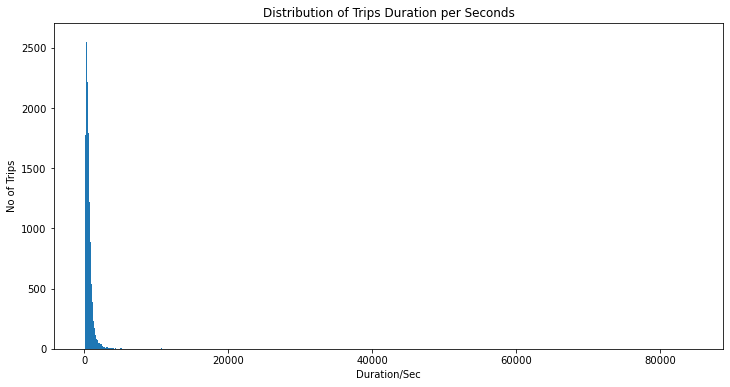

In [17]:
# start with trip duration histogram
binsize = 10
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**Distribution seems to much skew to the right. Let's try to limit the Durations.**

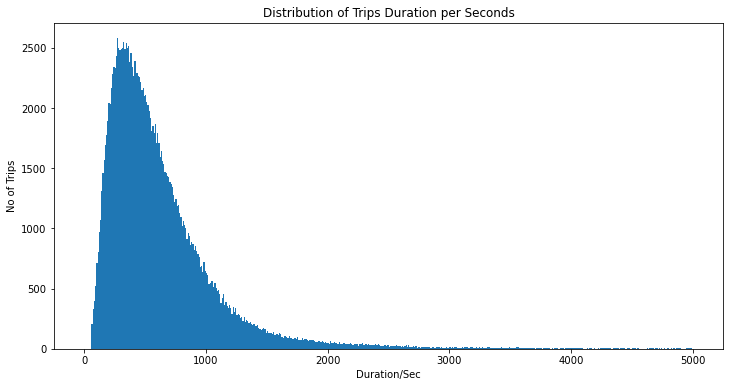

In [18]:
# start with trip duration histogram
binsize = 10
xlim = 10000 / 2 # seconds
bins = np.arange(0, xlim+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**Would be better to use log scale instead of limitaions**

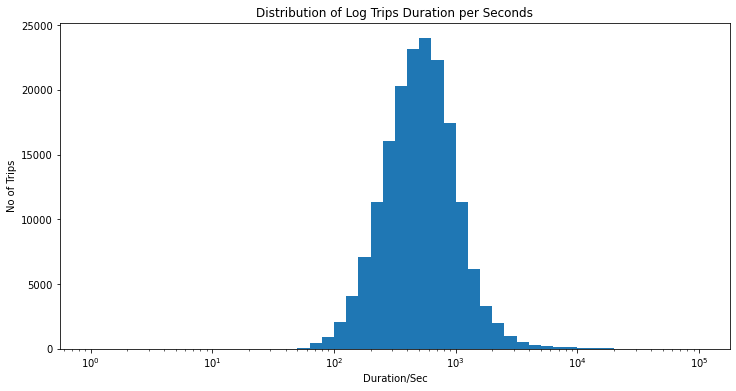

In [19]:
# log trip duration histogram
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+0.1, 0.1)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')

label(x='Duration/Sec', y='No of Trips', t='Distribution of Log Trips Duration per Seconds')

> **Distribution are symmetric with peak value at 500 second ~(about 8 minutes) which reasonable for a short rides.**

### Bikes Share and User Type

In [20]:
bike_counts = df['bike_share_for_all_trip'].value_counts()
bike_counts

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

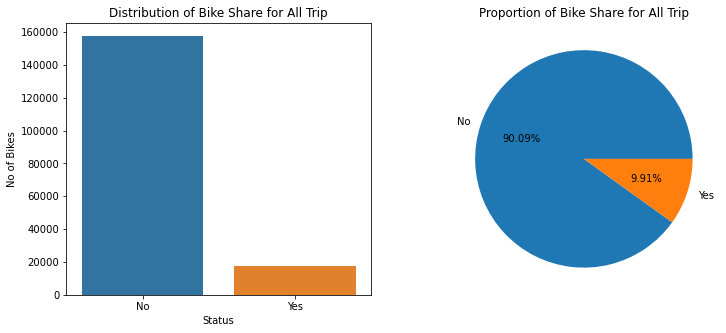

In [21]:
# let's now show no of bike_share_for_all_trip

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'bike_share_for_all_trip')

plt.title('Distribution of Bike Share for All Trip')
plt.ylabel('No of Bikes')
plt.xlabel('Status')

plt.subplot(1, 2, 2)
plt.pie(bike_counts, labels = bike_counts.index, autopct='%1.2f%%')
plt.title('Proportion of Bike Share for All Trip')

plt.show()

> **The following figure show that +90% of users does not share the bikes for all trip.**

In [22]:
user_counts = df['user_type'].value_counts()
user_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

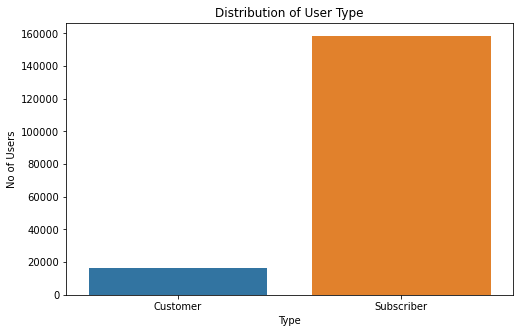

In [23]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = df, x = 'user_type')
label(x='Type', y='No of Users', t='Distribution of User Type')

>**The following figure show that +90% of users are subscribers and only +9% are customers.**

### Start and End Stations

In [24]:
st_staions = df.start_station_name.value_counts()[:15]
end_staions = df.end_station_name.value_counts()[:15]

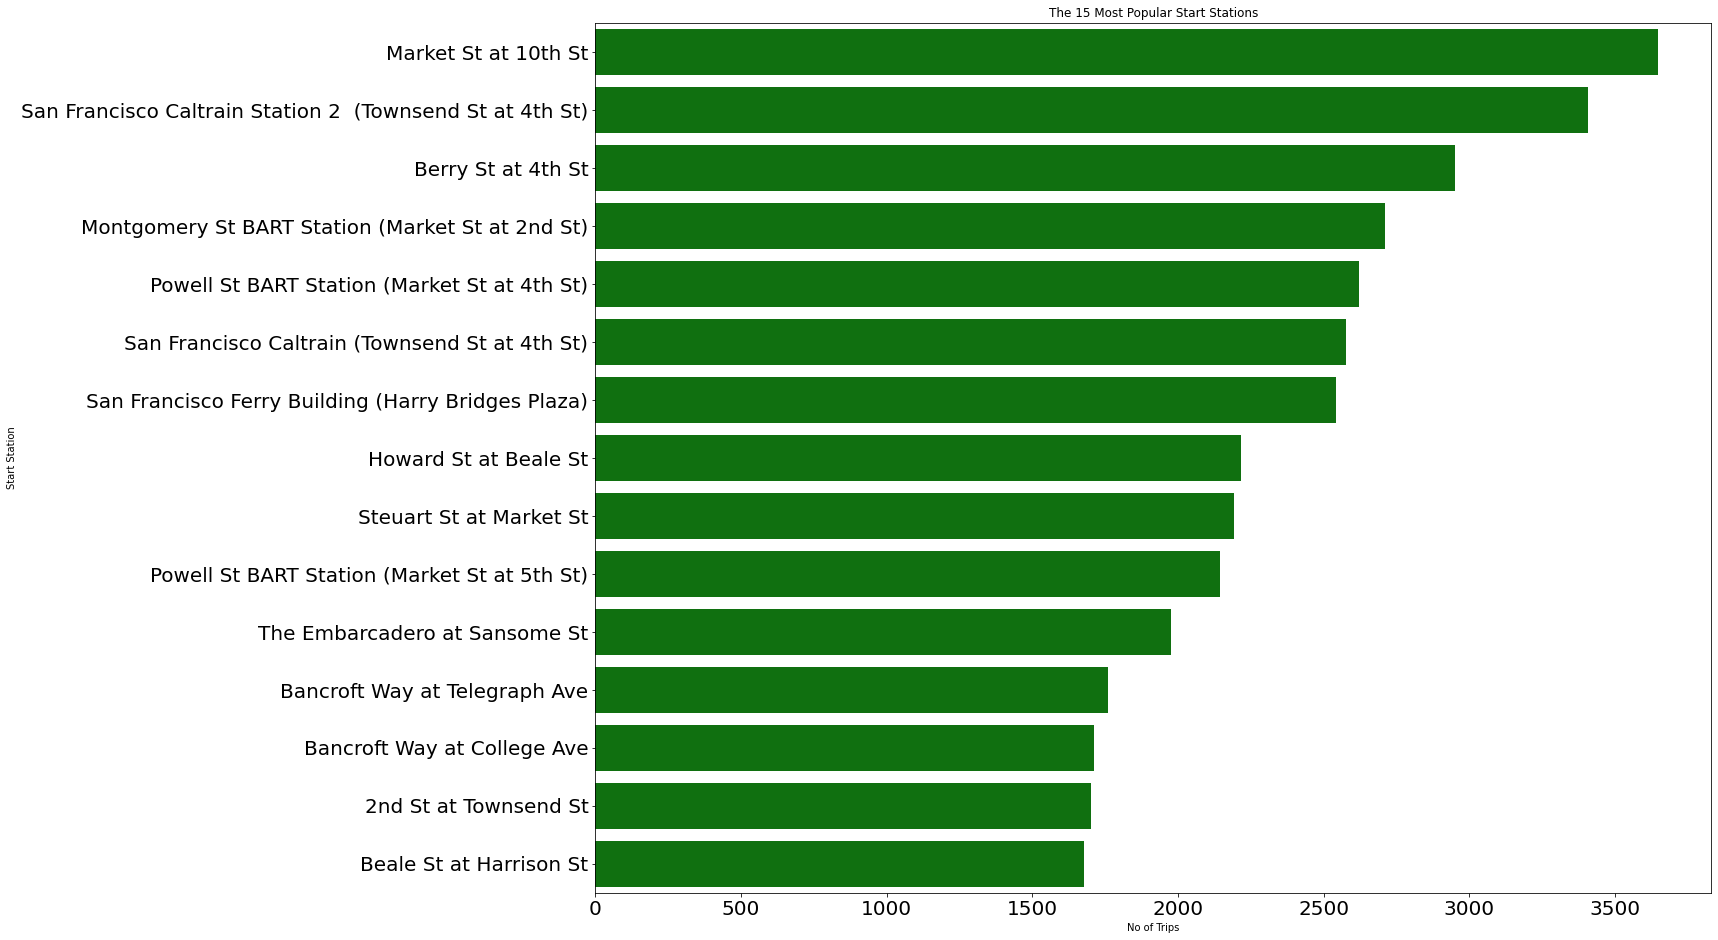

In [25]:
# start staion
plt.figure(figsize=[20, 16])

sns.barplot(y=st_staions.index, x= st_staions, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='Start Station', x='No of Trips', t='The 15 Most Popular Start Stations')

> **The avarage No. of trips between Top-15 start staion is +1.5K trip, and most strat station has +3.5K trip this month (Feb2019)**

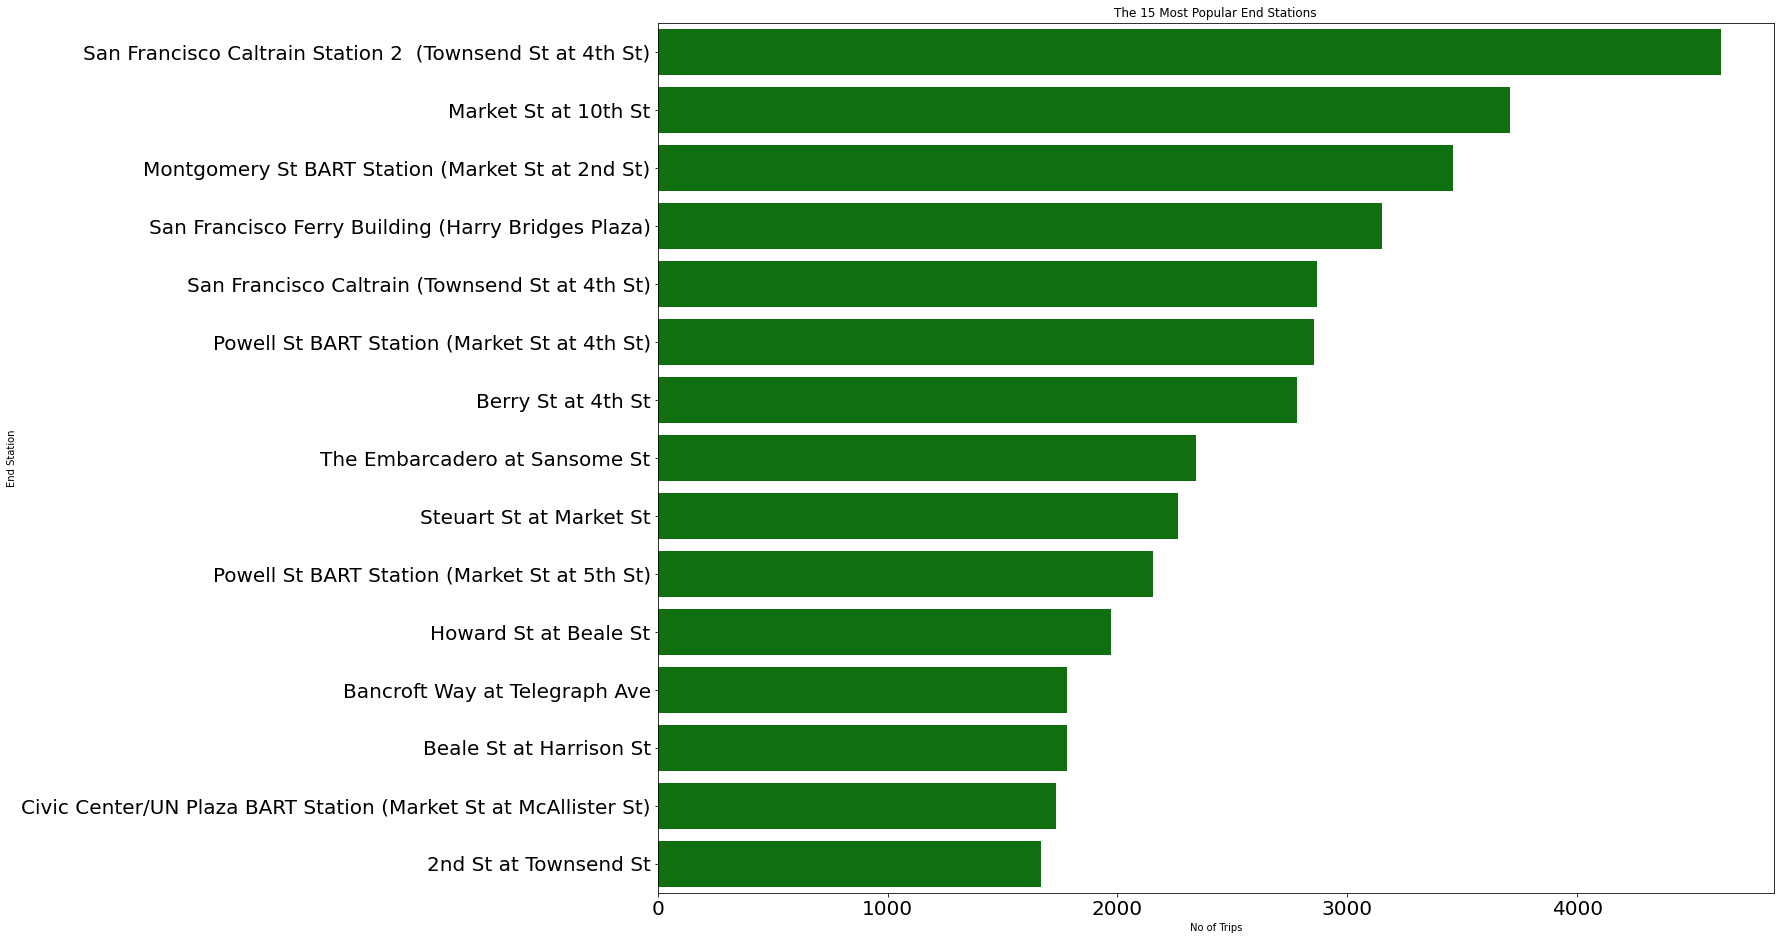

In [26]:
# end staion
plt.figure(figsize=[20, 16])

sns.barplot(y=end_staions.index, x= end_staions, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='End Station', x='No of Trips', t='The 15 Most Popular End Stations')

> **The avarage No. of trips between Top-15 end staion is +1K trip, and most end station has +4K trip this month (Feb2019)**

### Gender

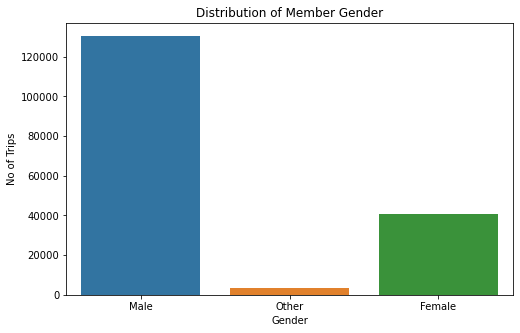

In [27]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = df, x = 'member_gender')

label(x='Gender', y='No of Trips', t='Distribution of Member Gender')

> **The figure show that most user are men with No. of trips exceed +120K. Female has made +40K trips this month**

## Birth Year

**Birth year could give us new feature related to user age**

In [28]:
df['age'] = 2019 - df['member_birth_year']
df['age'] = df['age'].astype('int')

df.drop(['member_birth_year'], axis=1, inplace=True)

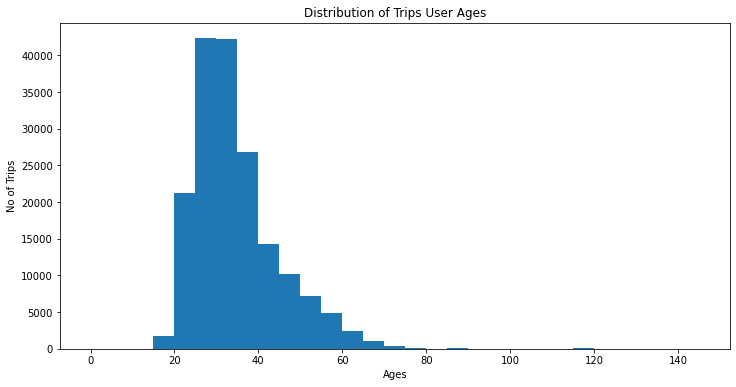

In [29]:
# start with trip duration histogram
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'age', bins = bins)
label(x='Ages', y='No of Trips', t='Distribution of Trips User Ages')

> **Most of user ages between 20-60 years old. with peak +40K trip for users who has 30-35 year.**

## Bivariate Exploration

> **Q: Where are this staions located?**

### Station Locations

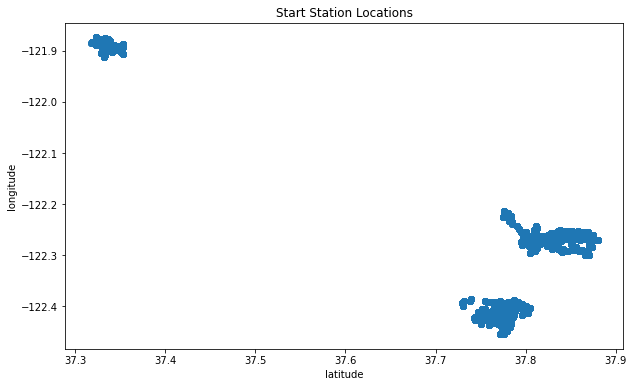

In [30]:
# start staions location

plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='start_station_latitude', y='start_station_longitude');
label(x='latitude', y='longitude', t='Start Station Locations')

> **Most of strater staions can be converted into 3 main clusters (Location)**

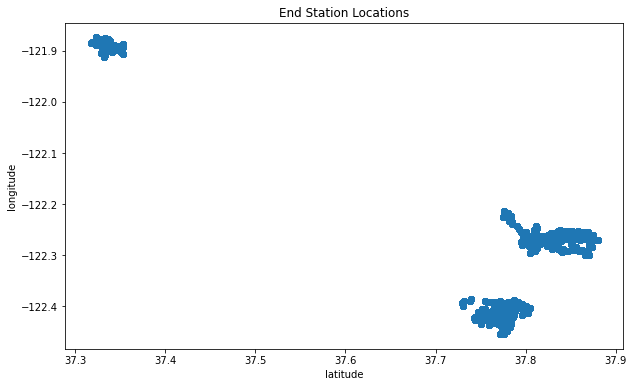

In [31]:
# end staions location

plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='end_station_latitude', y='end_station_longitude');
label(x='latitude', y='longitude', t='End Station Locations')

**Also most of end staions can be converted into 3 main clusters (Location)**

> **From graphs it seems that start and end stations located in the same geography places**

**2. When are most trips taken in terms of time of day, day of the week?**

### Days and Day of Week

In [32]:
df['start_day'] = df['start_time'].dt.day
df['start_week'] = df['start_time'].dt.day_name() # day_of_week

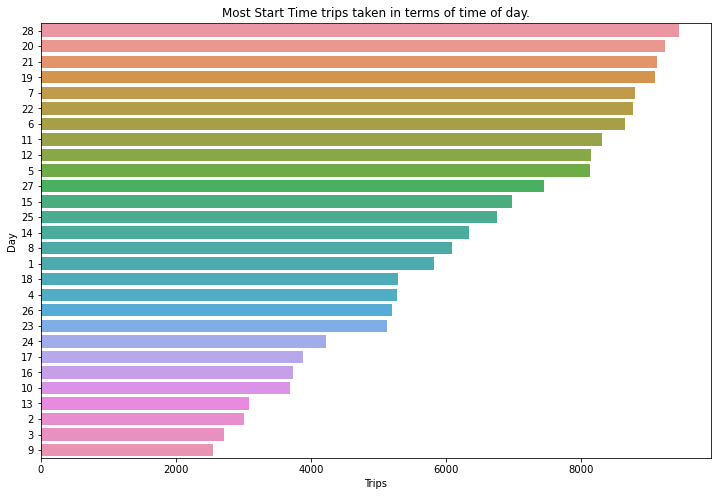

In [33]:
# start time day
days_count = df.start_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='start_day', order=days_count.index);
label(x='Trips', y='Day', t='Most Start Time trips taken in terms of time of day.')

> **Most user do starter trips at the last quarter  of the month and do lower trips at first quarters**

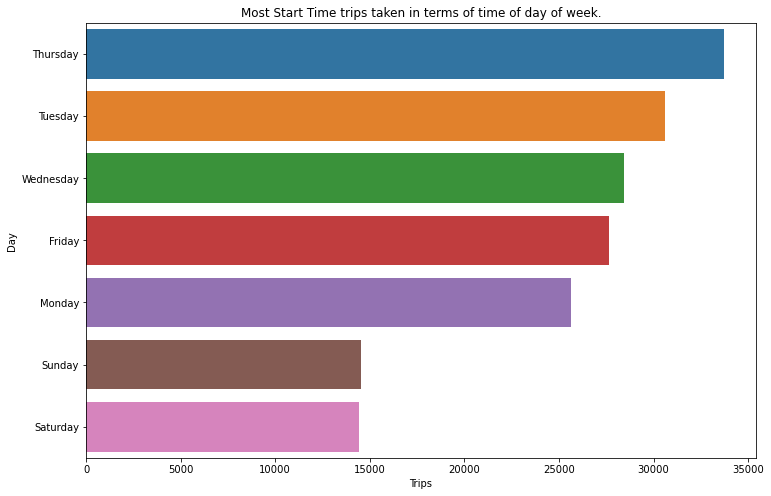

In [34]:
# start time day of week
days_count = df.start_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='start_week', order=days_count.index);
label(x='Trips', y='Day', t='Most Start Time trips taken in terms of time of day of week.')


> **Most of starter trips happened at Thursday (Weekend) and do lower trips Saturday**

In [35]:
df['end_day'] = df['end_time'].dt.day
df['end_week'] = df['end_time'].dt.day_name() # day_of_week

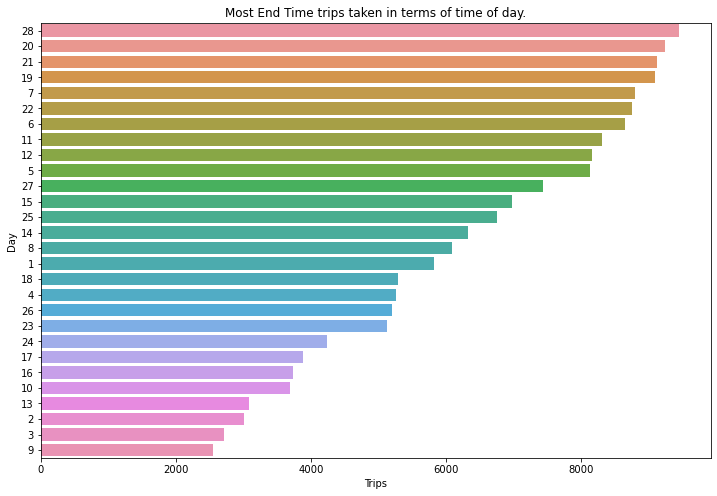

In [36]:
# end time day
days_count = df.end_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='end_day', order=days_count.index);
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day.')

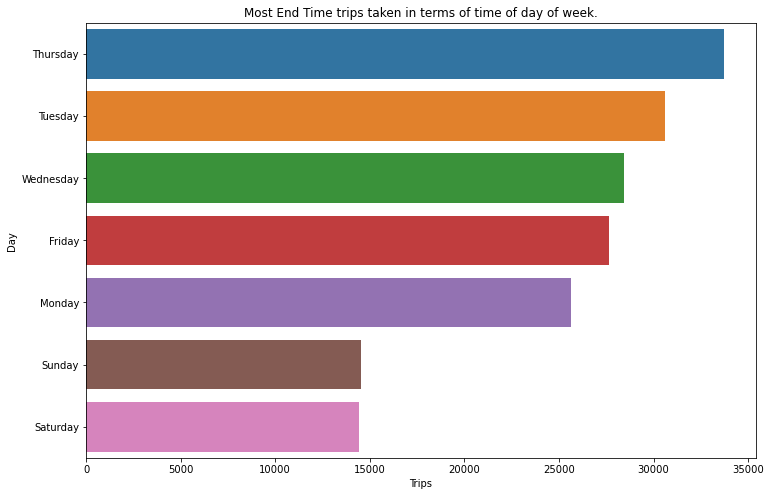

In [37]:
# start time day of week
days_count = df.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='end_week', order=days_count.index);
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day of week.')

> **End Trips dates are very similar to starter trips date**

### **which kind of user types do trips during the month?**

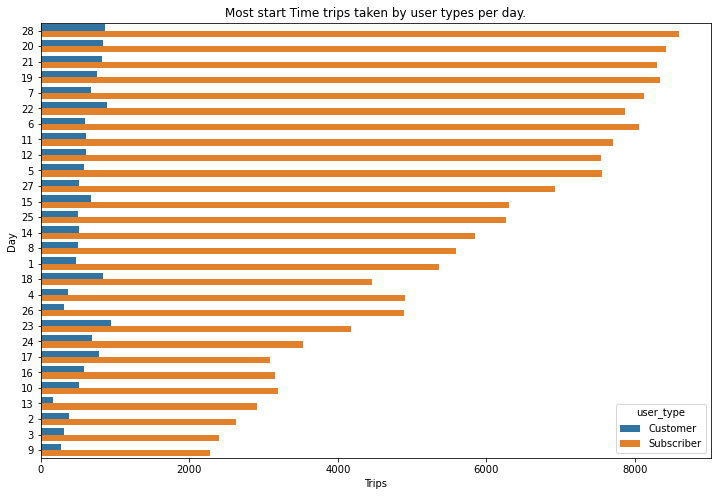

In [38]:
# end time day
days_count = df.start_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='start_day', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Most start Time trips taken by user types per day.')


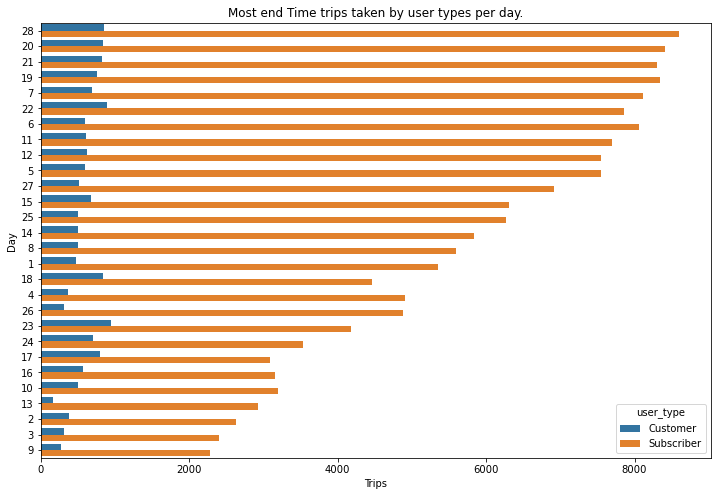

In [39]:
# end time day
days_count = df.end_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='end_day', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Most end Time trips taken by user types per day.')

> **Most user type in start and end stations are subscriber and some more customers increases in days 23 and 22.**

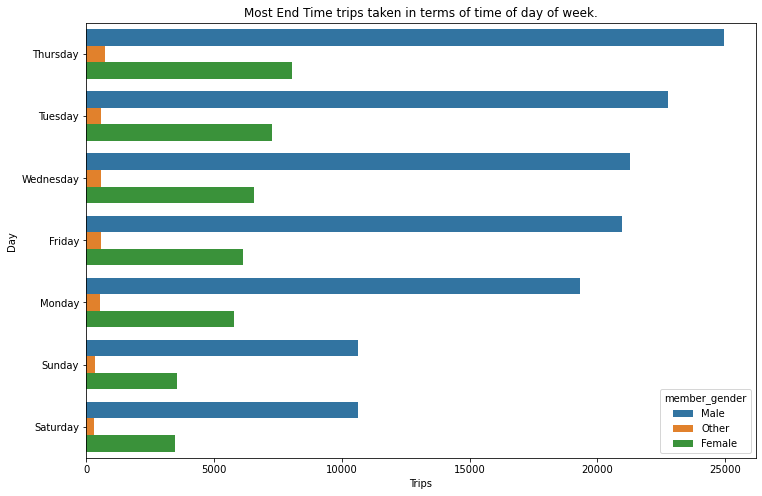

In [40]:
# start time day of week
days_count = df.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='end_week', order=days_count.index, hue='member_gender');
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day of week.')

> **gender distribution during the week is following the same distribution as week days.**

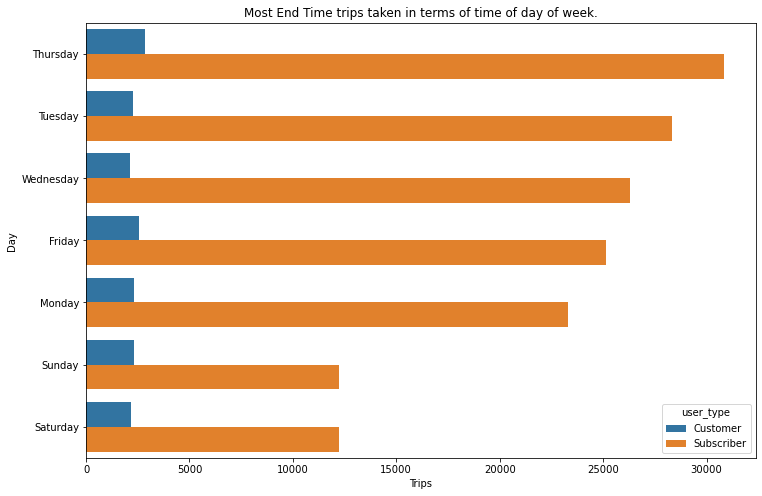

In [41]:
# start time day of week
days_count = df.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='end_week', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day of week.')


> **subscribers user active at Thursday and customer user active with conistant rate during the week.**

**3. Does the above depend on if a user is a subscriber or customer?**

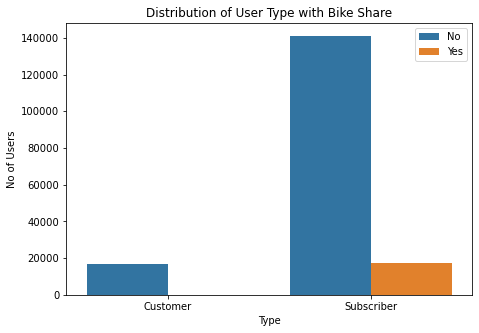

In [42]:
# let's now show no of user_type
plt.figure(figsize=[16, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'user_type', hue='bike_share_for_all_trip')
plt.legend(loc='best', )
label(x='Type', y='No of Users', t='Distribution of User Type with Bike Share')

**Most bike share comes from subscriper user.**

## Multivariate Exploration

## Data Correlations

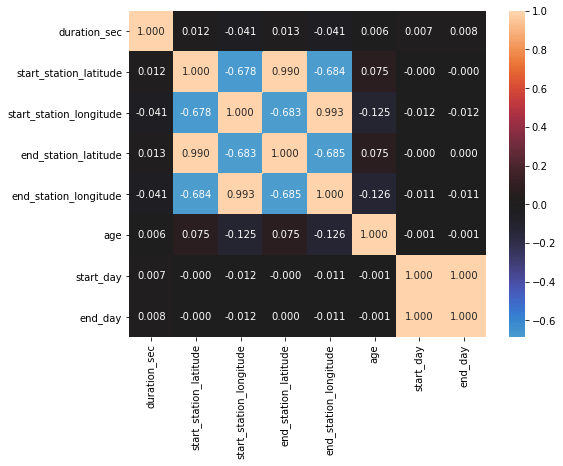

In [43]:
# lets now display the correlation between variables using heatmap
plt.figure(figsize = [8, 6])
corr = df.corr()
sns.heatmap(corr, 
            annot = True, 
            fmt = '.3f', 
            center = 0)
plt.show()

> **Strong correlation appearance between similar type features like locations and dates. and low correlation between other features**

### **Relation between Duration, Age and Gender?**

In [44]:
st_df = df.groupby('start_station_name')[['duration_sec', 'age']].mean()

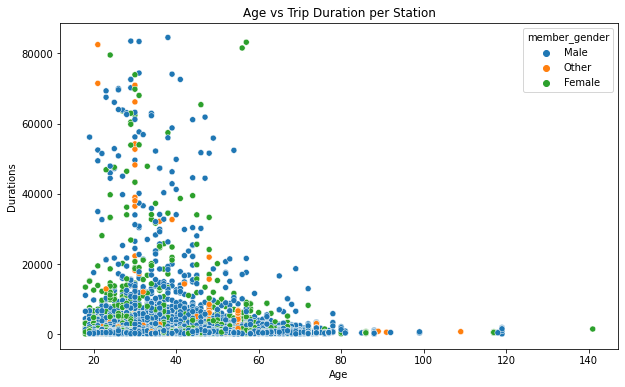

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration_sec', hue='member_gender')
label(x='Age', y='Durations', t='Age vs Trip Duration per Station')

> **Most distribution consist from mid age users, high duration does not depend on gender because all genders exist at the top of plot.**

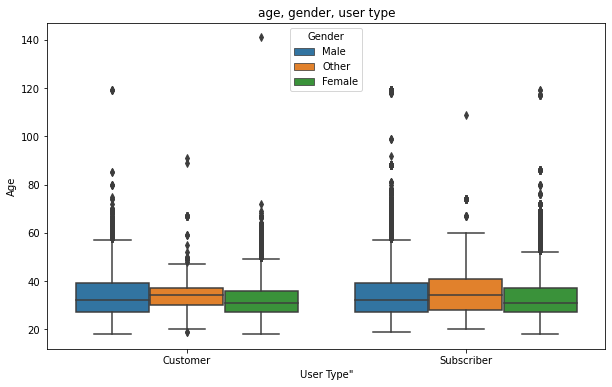

In [46]:
# let's get the relation between age, gender, user type
plt.figure(figsize=(10, 6))

sns.boxplot(data = df, x = 'user_type',  y = 'age', hue='member_gender')

plt.legend(title="Gender")
label(y='Age', x='User Type"', t='age, gender, user type')

> **Range (variance) of subscribers are slightly larger than customers.**

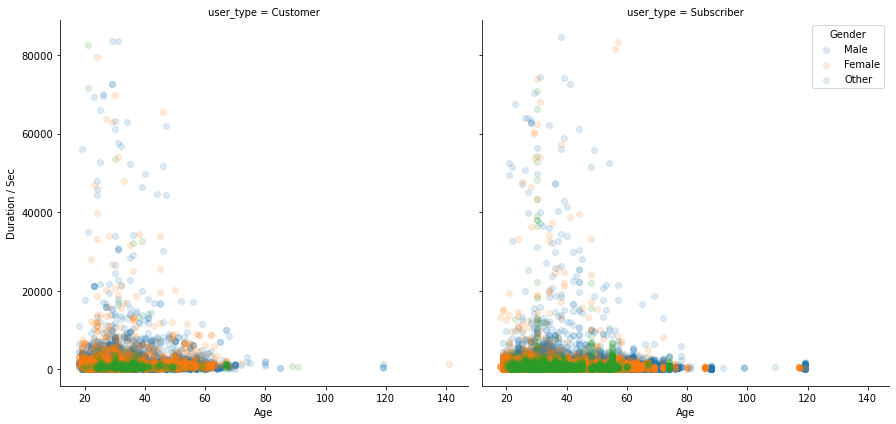

In [47]:
# let's display the relation between duration, age, user type, gender feature
# create faceted heat maps on the user type variable
graph = sns.FacetGrid(data = df, 
                      col = 'user_type', 
                      hue='member_gender', 
                      hue_order=['Male','Female','Other'], 
                      col_wrap = 6, height = 6
                     )

graph.map(plt.scatter, 'age', 'duration_sec', alpha=0.15)
graph.set_xlabels('Age')
graph.set_ylabels('Duration / Sec')
plt.legend(title="Gender")
plt.show()

> **Mid age and older users from both type shows high trip durations.**

###  Station Latitude and Longitude (Locations) Relationships.

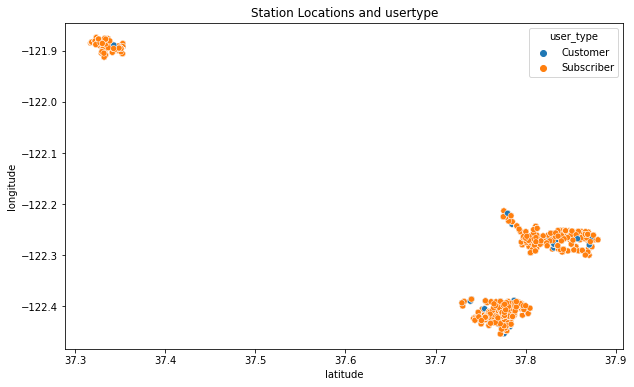

In [48]:
### Station Latitude and Longitude and UserType

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='user_type');

label(y='longitude', x='latitude', t="Station Locations and usertype")

> **Subscriber users spread across the 3 main staions locations (clusters), there is few customer users existing in the upper right cluster.**

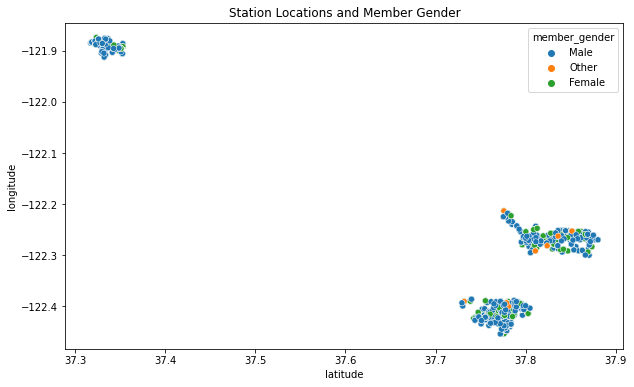

In [49]:
### Station Latitude and Longitude and member_gender

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='member_gender');
label(y='longitude', x='latitude', t="Station Locations and Member Gender")


> **Male uses the 3 main locations (clusters) more than Females.**

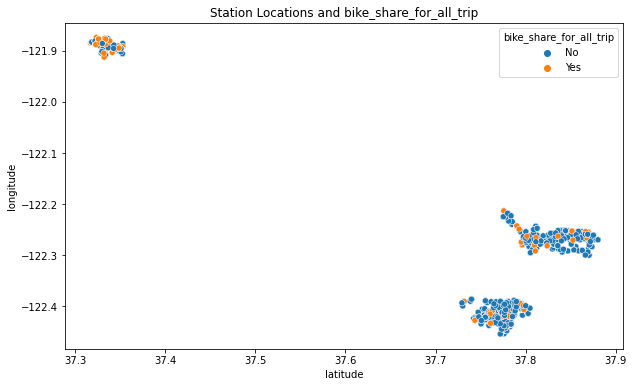

In [50]:
### Station Latitude and Longitude and bike_share_for_all_trip

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='bike_share_for_all_trip');

label(y='longitude', x='latitude', t="Station Locations and bike_share_for_all_trip")


> **User who started thire journey from the left cluster are more likely to share bike for all trip than users who use bikes from both right locations.**

<hr>

### Multivariate Exploration Insights

- Correlations between features make sense. 
- Strong correlation appearance between similar type features like locations:
    - **start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude**

also dates: **start_day, end_day,** 

and correlation close to zero between other features.

- High duration trips does not related to gender but and most trips consist of mid age users.
- Age range of subscribers user type are slightly larger than customers.
- Subscriber users uses the 3 main staions locations more than other users types.
- Male spread on the 3 main locations (clusters) more than Females.
- User who started thire journey from the left cluster are more likely to share bike for all trip than users who use bikes from both right locations.

In [51]:
df.to_csv('201902-fordgobike-tripdata-clean.csv', index=False)